In [323]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

In [324]:
original_df = pd.read_csv("sp23_datachallenge.csv")
print("dimensions:", original_df.shape)
original_df.head(10)

dimensions: (1000000, 32)


,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,10650.765523,3134.319630,3863.647740,1,6,CA,185,0,BA,1,0,24,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,534.047319,2670.918292,3124.298166,718,3,CA,259,1,BA,0,0,15,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,4048.534263,2893.621498,3159.590679,1,14,CB,177,1,BA,0,1,-1,0,200.0,0,INTERNET,4.728705,other,0,1,0,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,3457.064063,4054.908412,3022.261812,1921,6,CA,110,1,BA,0,1,31,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,5020.341679,2728.237159,3087.670952,1990,2,CA,295,1,BA,1,0,31,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7
5,1,0.3,0.143921,-1,30,30,0.028231,-0.748282,AD,732,3223.248406,3804.803402,5078.692467,5,13,CA,199,1,BB,0,1,15,0,200.0,0,INTERNET,4.815073,windows,0,1,0,7
6,1,0.7,0.321554,-1,152,30,0.030680,-0.278994,AB,876,5515.771548,2653.430035,3089.788379,13,10,CA,272,1,BA,1,1,30,0,1500.0,0,INTERNET,1.558977,windows,1,1,0,7
7,1,0.9,0.064817,-1,18,50,0.034557,-1.265721,AB,901,4736.214496,6733.703890,3826.129170,40,1,CB,83,1,BB,1,0,28,0,200.0,1,INTERNET,2.637472,linux,0,1,0,7
8,1,0.7,0.065938,-1,64,40,0.020691,-1.442082,AB,933,6101.250655,3849.761426,3089.271130,2134,4,CC,222,0,BA,1,1,30,0,1500.0,0,INTERNET,2.175419,windows,1,1,0,7
9,1,0.9,0.700096,-1,60,40,0.016809,-1.070271,AB,1176,4504.470396,3793.831786,3061.245889,8,2,CB,118,1,BC,0,1,25,0,200.0,0,INTERNET,24.040726,windows,0,1,0,7


In [325]:
original_df.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')

## Data Cleaning/Exploration

In [326]:
original_df['device_os'].unique()

array(['windows', 'other', 'linux', 'macintosh', 'x11'], dtype=object)

In [327]:
original_df['payment_type'].unique()

array(['AA', 'AB', 'AC', 'AD', 'AE'], dtype=object)

In [328]:
original_df['housing_status'].unique()

array(['BA', 'BB', 'BC', 'BD', 'BE', 'BF', 'BG'], dtype=object)

In [329]:
original_df['source'].unique()

array(['INTERNET', 'TELEAPP'], dtype=object)

In [330]:
original_df.isna().sum().sum()

0

/var/folders/qg/g7gs2bjn2llf1p8c229qrymw0000gn/T/ipykernel_3095/2294838852.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  original_df.hist(ax = axes)


array([[<AxesSubplot:title={'center':'fraud_bool'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'name_email_similarity'}>,
        <AxesSubplot:title={'center':'prev_address_months_count'}>,
        <AxesSubplot:title={'center':'current_address_months_count'}>],
       [<AxesSubplot:title={'center':'customer_age'}>,
        <AxesSubplot:title={'center':'days_since_request'}>,
        <AxesSubplot:title={'center':'intended_balcon_amount'}>,
        <AxesSubplot:title={'center':'zip_count_4w'}>,
        <AxesSubplot:title={'center':'velocity_6h'}>],
       [<AxesSubplot:title={'center':'velocity_24h'}>,
        <AxesSubplot:title={'center':'velocity_4w'}>,
        <AxesSubplot:title={'center':'bank_branch_count_8w'}>,
        <AxesSubplot:title={'center':'date_of_birth_distinct_emails_4w'}>,
        <AxesSubplot:title={'center':'credit_risk_score'}>],
       [<AxesSubplot:title={'center':'email_is_free'}>,
        <AxesSubplot:title={'center':'p

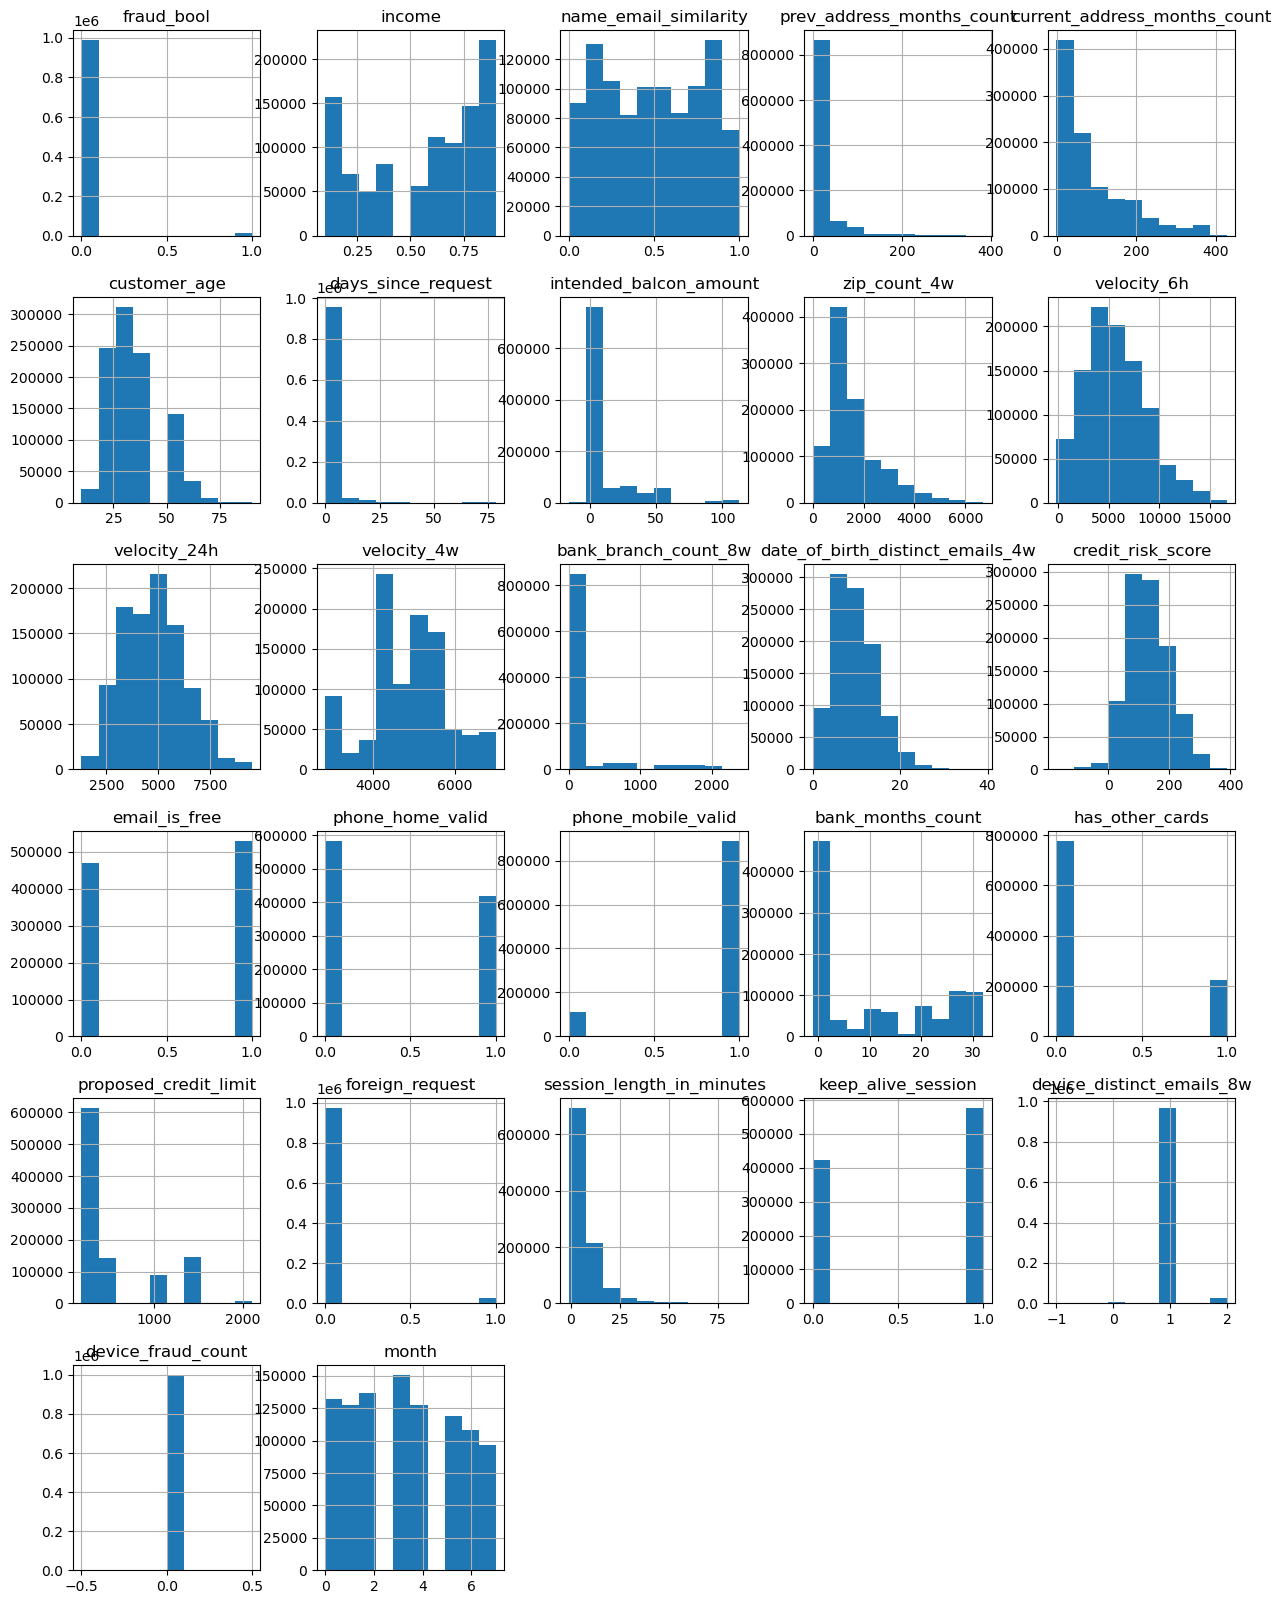

In [331]:
# distribution of each of the variables
fig = plt.figure(figsize=(15, 20))
axes = fig.gca()
original_df.hist(ax = axes)

In [332]:
original_df.head(10)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,10650.765523,3134.319630,3863.647740,1,6,CA,185,0,BA,1,0,24,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,534.047319,2670.918292,3124.298166,718,3,CA,259,1,BA,0,0,15,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,4048.534263,2893.621498,3159.590679,1,14,CB,177,1,BA,0,1,-1,0,200.0,0,INTERNET,4.728705,other,0,1,0,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,3457.064063,4054.908412,3022.261812,1921,6,CA,110,1,BA,0,1,31,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,5020.341679,2728.237159,3087.670952,1990,2,CA,295,1,BA,1,0,31,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7
5,1,0.3,0.143921,-1,30,30,0.028231,-0.748282,AD,732,3223.248406,3804.803402,5078.692467,5,13,CA,199,1,BB,0,1,15,0,200.0,0,INTERNET,4.815073,windows,0,1,0,7
6,1,0.7,0.321554,-1,152,30,0.030680,-0.278994,AB,876,5515.771548,2653.430035,3089.788379,13,10,CA,272,1,BA,1,1,30,0,1500.0,0,INTERNET,1.558977,windows,1,1,0,7
7,1,0.9,0.064817,-1,18,50,0.034557,-1.265721,AB,901,4736.214496,6733.703890,3826.129170,40,1,CB,83,1,BB,1,0,28,0,200.0,1,INTERNET,2.637472,linux,0,1,0,7
8,1,0.7,0.065938,-1,64,40,0.020691,-1.442082,AB,933,6101.250655,3849.761426,3089.271130,2134,4,CC,222,0,BA,1,1,30,0,1500.0,0,INTERNET,2.175419,windows,1,1,0,7
9,1,0.9,0.700096,-1,60,40,0.016809,-1.070271,AB,1176,4504.470396,3793.831786,3061.245889,8,2,CB,118,1,BC,0,1,25,0,200.0,0,INTERNET,24.040726,windows,0,1,0,7


In [333]:
# proportion of frauds
np.mean(original_df['fraud_bool'] == 1)

0.011029

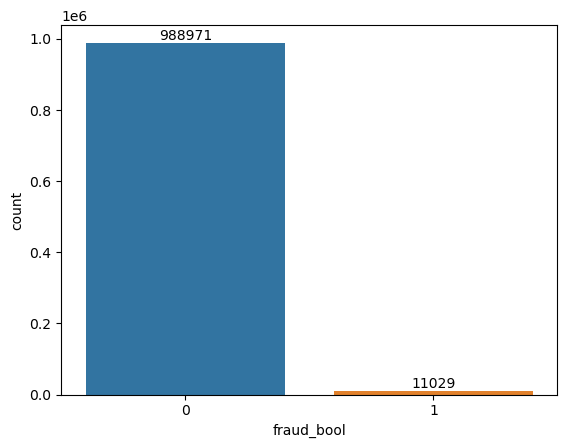

In [450]:
ax = sns.countplot(data=original_df, x='fraud_bool')
for i in ax.containers:
    ax.bar_label(i)

In [335]:
original_df[original_df['fraud_bool'] == 0]

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
1428,0,0.9,0.647941,-1,70,40,0.012117,-0.766488,AC,522,4368.551141,3202.695262,3043.081927,2,4,CA,116,0,BA,0,1,15,0,200.0,0,INTERNET,1.007767,windows,1,1,0,7
1429,0,0.6,0.609731,142,38,20,0.009758,-0.936167,AD,1634,6282.882178,4419.694255,3439.900724,7,6,CF,129,1,BB,0,1,21,0,200.0,0,INTERNET,9.211731,windows,1,1,0,7
1430,0,0.7,0.559477,-1,31,40,0.018022,-1.292500,AB,584,3516.888101,3004.642827,3092.463424,16,8,CA,88,0,BC,0,1,1,0,200.0,0,INTERNET,6.292767,other,1,1,0,7
1431,0,0.2,0.697797,-1,43,20,0.010220,-1.216727,AB,536,5170.186270,3402.022582,5128.904170,12,17,CF,81,1,BE,1,1,2,0,500.0,0,INTERNET,4.174046,windows,1,1,0,7
1432,0,0.9,0.851661,-1,67,40,0.018711,-1.157349,AB,1285,2033.311502,2463.526050,3071.027172,16,7,CE,121,0,BA,1,1,25,0,200.0,0,INTERNET,2.663006,linux,1,1,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0.6,0.192631,-1,104,40,0.030592,-1.044454,AB,804,7905.711839,8341.468557,4972.635997,1,8,CA,75,1,BC,1,1,25,0,200.0,0,INTERNET,8.511502,linux,1,1,0,4
999996,0,0.8,0.322989,148,9,50,1.628119,-1.409803,AC,3306,5391.470463,4955.170808,5022.728108,0,2,CC,154,1,BC,1,1,-1,0,200.0,0,INTERNET,8.967865,windows,0,1,0,4
999997,0,0.8,0.879403,-1,30,20,0.018563,34.692760,AA,1522,8063.102636,5670.654316,4377.196321,2023,6,CF,64,0,BC,0,1,11,0,200.0,0,INTERNET,8.195531,other,0,1,0,4
999998,0,0.9,0.762112,-1,189,20,0.015352,94.661055,AA,1418,8092.641762,3982.582204,4394.803296,1678,6,CA,163,0,BA,1,0,28,0,500.0,0,INTERNET,4.336064,windows,1,1,0,4


### Inconsistencies

Removing rows where the values seem to be inaccurate

In [336]:
# deep copy of the original dataframe
inconsist_df = original_df.copy()
inconsist_df.shape

(1000000, 32)

In [337]:
# drop all the rows where the customer age is less than 0 
cur_size = inconsist_df.shape[0]
inconsist_df = inconsist_df[inconsist_df['customer_age'] > 0]
print(f'Total number of rows dropped: {cur_size - inconsist_df.shape[0]}')

Total number of rows dropped: 0


In [338]:
# drop all the rows where 'velocity_6h' is less than 0
cur_size = inconsist_df.shape[0]
inconsist_df = inconsist_df[inconsist_df['velocity_6h'] >= 0]
print(f'Total number of rows dropped: {cur_size - inconsist_df.shape[0]}')

Total number of rows dropped: 44


### Outliers

In [339]:
# columns that are somewhat skewed based on the previous distribution graph
checked_columns = ['velocity_6h', 'velocity_24h', 'velocity_4w']

I will be removing all the outliers

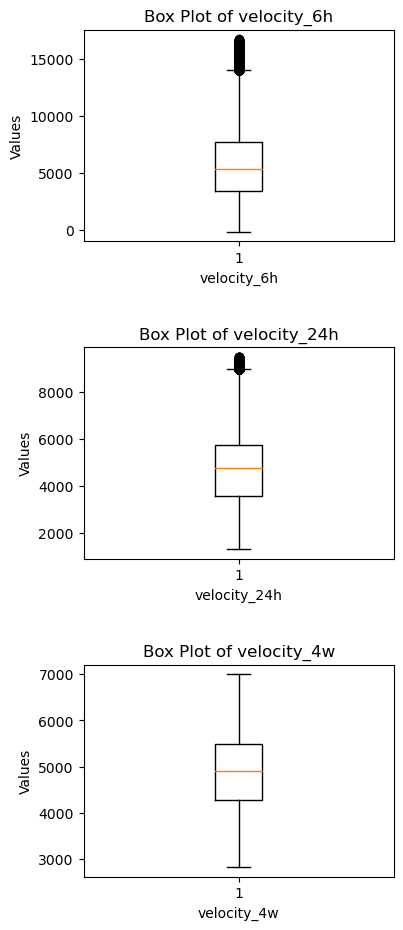

In [340]:
fig, axes = plt.subplots(nrows=len(checked_columns), figsize=(4,11))

for i, column in enumerate(checked_columns):
    axes[i].boxplot(original_df[column])

    axes[i].set_title('Box Plot of {}'.format(column))
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Values")


plt.subplots_adjust(hspace=0.5)

In [341]:
outliers_df = inconsist_df.copy()

In [342]:
for column in checked_columns:
    cur = outliers_df.shape[0]
    q1, q3 = np.percentile(outliers_df[column], [25,75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr) 
    upper_bound = q3 + (1.5 * iqr)

    # print(np.mean(outliers_df[(outliers_df[column] > lower_bound) & (outliers_df[column] < upper_bound)]))
    outliers_df = outliers_df[(outliers_df[column] > lower_bound) & (outliers_df[column] < upper_bound)]
    print(f"Number of outliers of '{column}' is {cur - outliers_df.shape[0]}")
    cur = outliers_df.shape[0]

Number of outliers of 'velocity_6h' is 9007
Number of outliers of 'velocity_24h' is 3558
Number of outliers of 'velocity_4w' is 0


In [343]:
outliers_df.shape

(987391, 32)

I removed the outliers of the 3 variables.

### Missing Data

Since the percentage of missing data for prev_address_months_count is extremely high (with over 70% of it missing), I decided to completely drop this column so it doesn't negatively affect the performance in the end

In [344]:
np.mean(outliers_df['prev_address_months_count'] == -1)

0.7121069566159708

<AxesSubplot:xlabel='prev_address_months_count', ylabel='Count'>

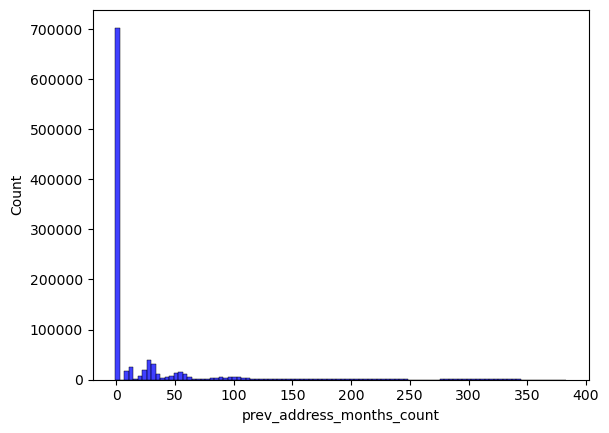

In [345]:
sns.histplot(data=outliers_df, x='prev_address_months_count', bins=100, color='blue')

In [346]:
missing_df = outliers_df.drop('prev_address_months_count', axis=1)
missing_df.shape

(987391, 31)

Because "bank_months_count" and "current_address_months_count" have a smaller proportion of data that are missing, we can do mean imputation on it

In [347]:
np.mean(outliers_df['bank_months_count'] == -1)

0.2544858115984448

In [348]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
missing_df['bank_months_count'] = imputer.fit_transform(outliers_df[['bank_months_count']])

In [349]:
np.mean(outliers_df['current_address_months_count'] == -1)

0.004263761772185487

In [350]:
missing_df['current_address_months_count'] = imputer.fit_transform(missing_df[['current_address_months_count']])

In [351]:
missing_df.head(5)

,fraud_bool,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,88.0,50,0.020925,-1.331345,AA,769,10650.765523,3134.319630,3863.647740,1,6,CA,185,0,BA,1,0,24.0,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,144.0,50,0.005418,-0.816224,AB,366,534.047319,2670.918292,3124.298166,718,3,CA,259,1,BA,0,0,15.0,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,132.0,40,3.108549,-0.755728,AC,870,4048.534263,2893.621498,3159.590679,1,14,CB,177,1,BA,0,1,-1.0,0,200.0,0,INTERNET,4.728705,other,0,1,0,7
3,1,0.9,0.159511,22.0,50,0.019079,-1.205124,AB,810,3457.064063,4054.908412,3022.261812,1921,6,CA,110,1,BA,0,1,31.0,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7
4,1,0.9,0.596414,218.0,50,0.004441,-0.773276,AB,890,5020.341679,2728.237159,3087.670952,1990,2,CA,295,1,BA,1,0,31.0,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7


### Duplicated rows

In [352]:
duplicated_rows = missing_df.duplicated()
print(f'Number of Duplicated Rows: {duplicated_rows.sum()}')

Number of Duplicated Rows: 0


There are no duplicated entries in this dataset

## EDA

<AxesSubplot:>

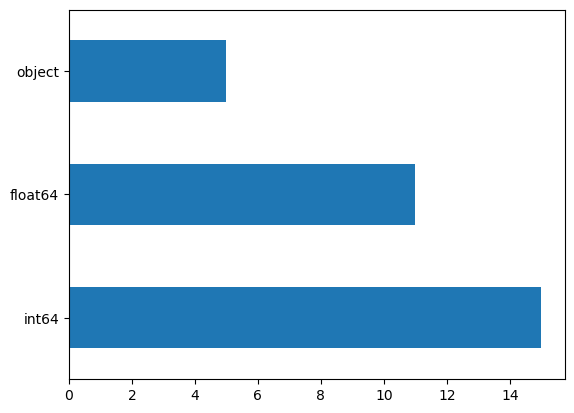

In [353]:
# distribution of the data types
missing_df.dtypes.value_counts().plot(kind='barh')

/var/folders/qg/g7gs2bjn2llf1p8c229qrymw0000gn/T/ipykernel_3095/3417440895.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(missing_df.corr(), annot=True, cmap=sns.color_palette('RdBu',50), fmt='.2f')


<AxesSubplot:>

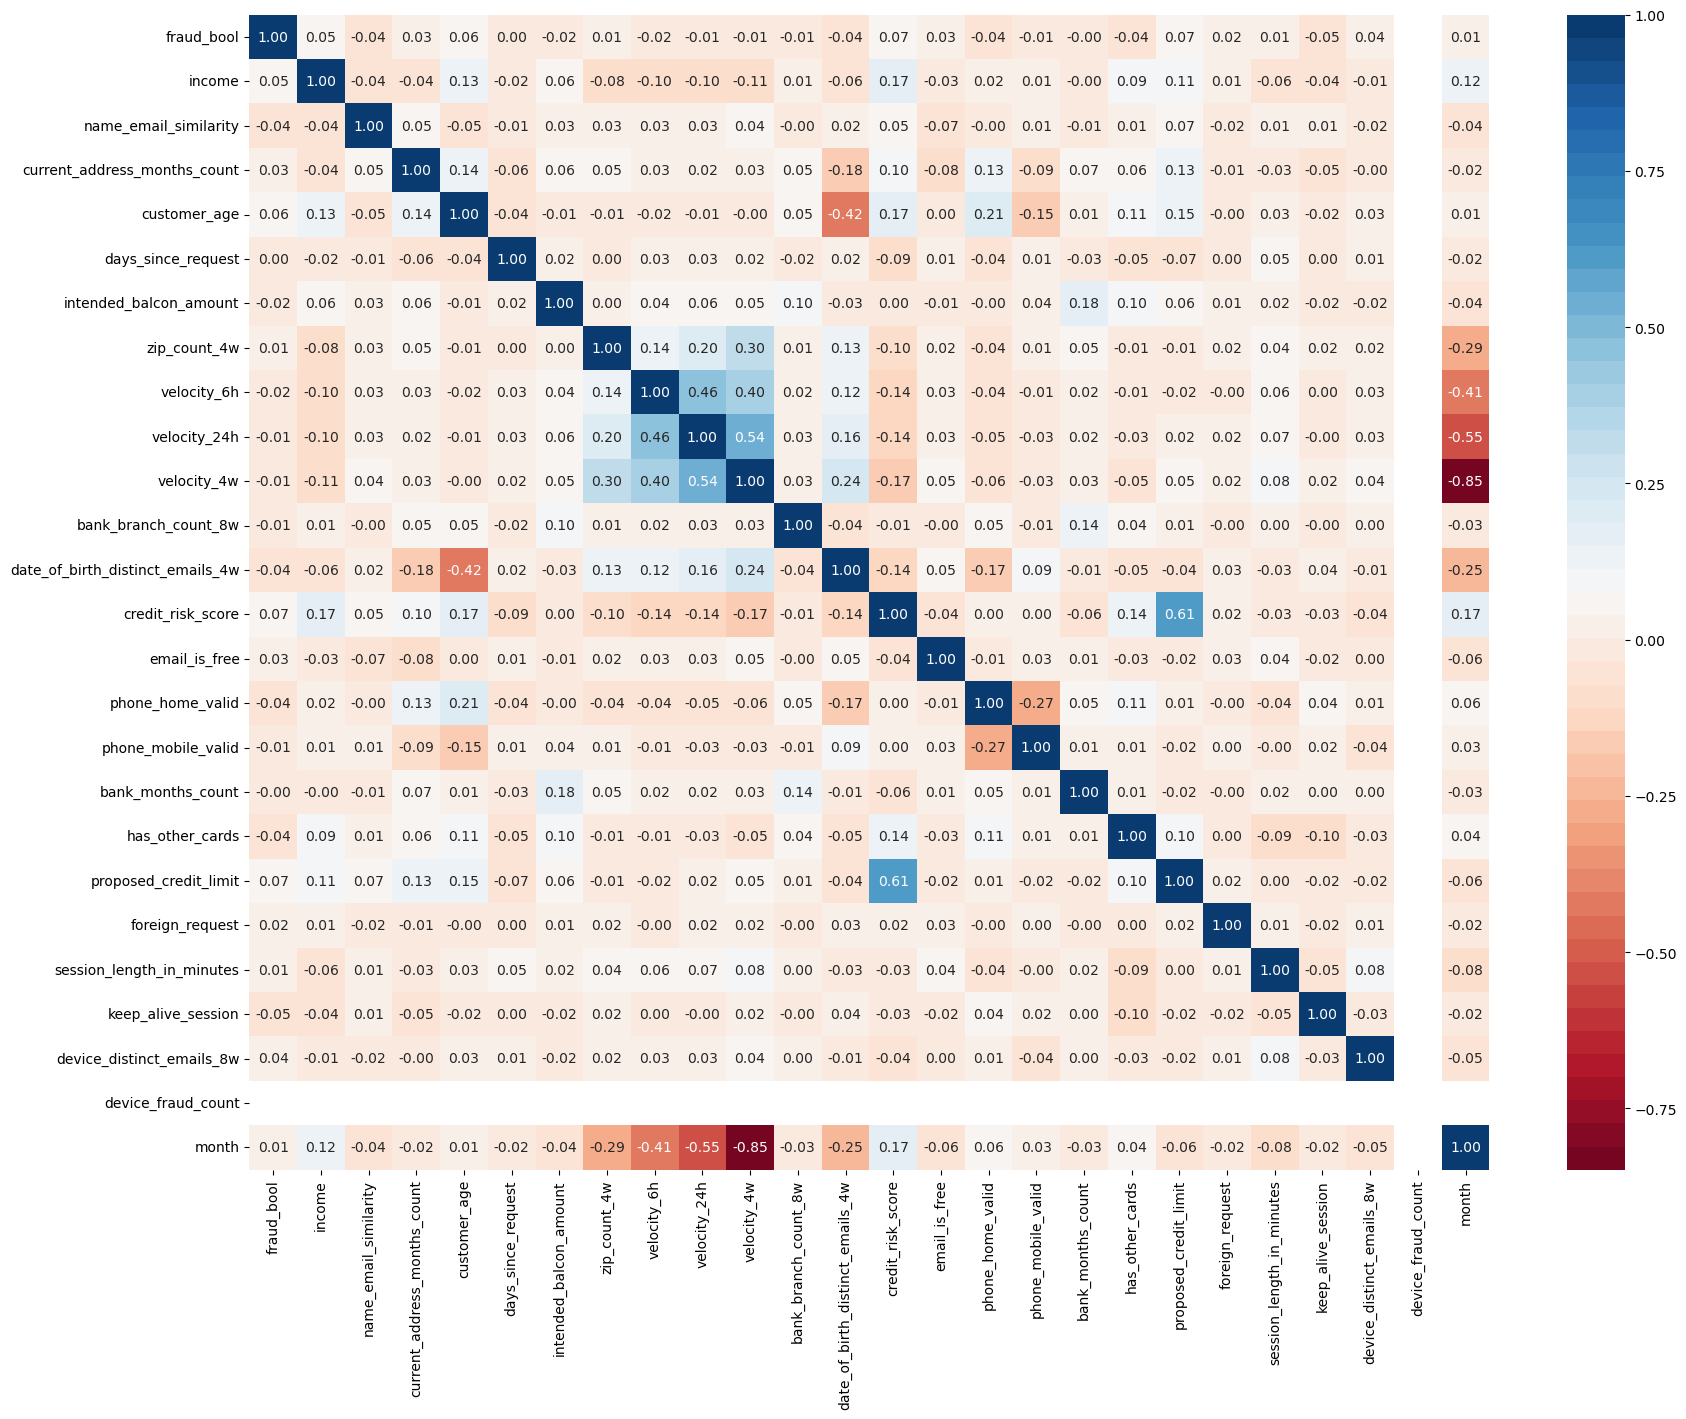

In [354]:
# correlations between the columns
plt.figure(figsize=(20, 15))
sns.heatmap(missing_df.corr(), annot=True, cmap=sns.color_palette('RdBu',50), fmt='.2f')

In [355]:
corr = missing_df.corr().abs()
corr = corr.sort_values(by=['fraud_bool'], ascending=False)
top_correlated_vars = corr.loc[:, 'fraud_bool']
top_correlated_vars[:]

/var/folders/qg/g7gs2bjn2llf1p8c229qrymw0000gn/T/ipykernel_3095/3498231258.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = missing_df.corr().abs()


fraud_bool                          1.000000
credit_risk_score                   0.070972
proposed_credit_limit               0.069357
customer_age                        0.063113
keep_alive_session                  0.050541
income                              0.045235
date_of_birth_distinct_emails_4w    0.043247
name_email_similarity               0.036843
device_distinct_emails_8w           0.035781
has_other_cards                     0.035281
phone_home_valid                    0.035251
current_address_months_count        0.033916
email_is_free                       0.028051
intended_balcon_amount              0.024687
foreign_request                     0.016964
velocity_6h                         0.016563
phone_mobile_valid                  0.013081
month                               0.012956
bank_branch_count_8w                0.011554
velocity_4w                         0.011272
velocity_24h                        0.010366
session_length_in_minutes           0.009032
zip_count_

Pick out two of the highest-related variables to fraud_bool (credit_risk_score and proposed_credit_limit)

<AxesSubplot:xlabel='fraud_bool', ylabel='credit_risk_score'>

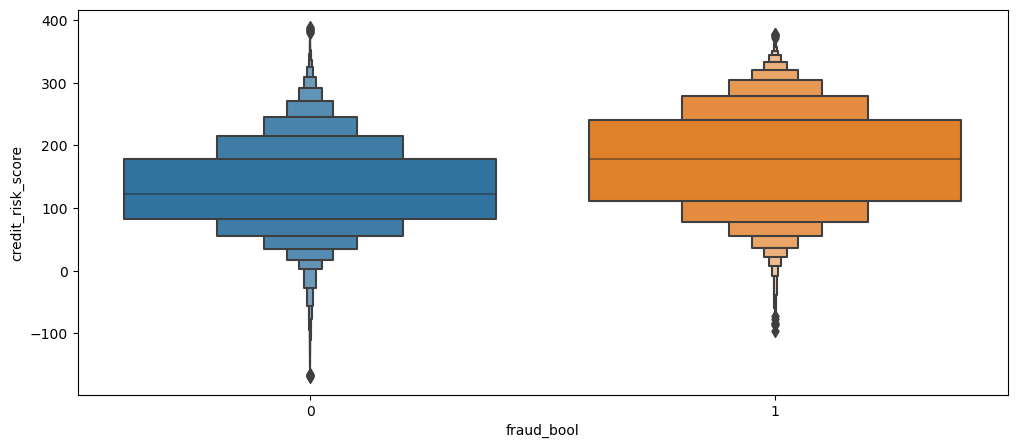

In [356]:
# credit risk score is normally distributed so we don't need to take log to transform it
plt.figure(figsize=(12,5))
sns.boxenplot(y='credit_risk_score', x='fraud_bool', data=missing_df)

<AxesSubplot:xlabel='fraud_bool', ylabel='proposed_credit_limit'>

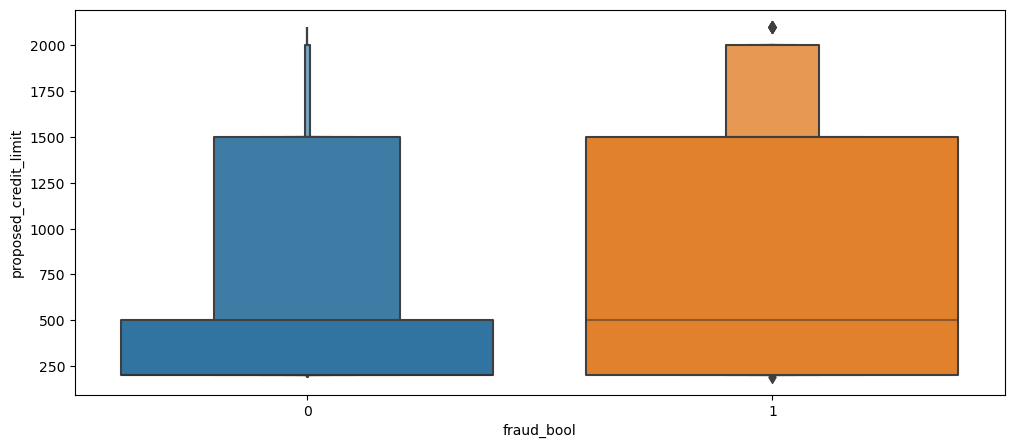

In [357]:
# proposed credit limit
plt.figure(figsize=(12,5))
sns.boxenplot(y='proposed_credit_limit', x='fraud_bool', data=missing_df)

/var/folders/qg/g7gs2bjn2llf1p8c229qrymw0000gn/T/ipykernel_3095/3876419575.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(data=missing_df, x='customer_age', y='fraud_bool', kind='bar', height=5, aspect=2, ci=None)


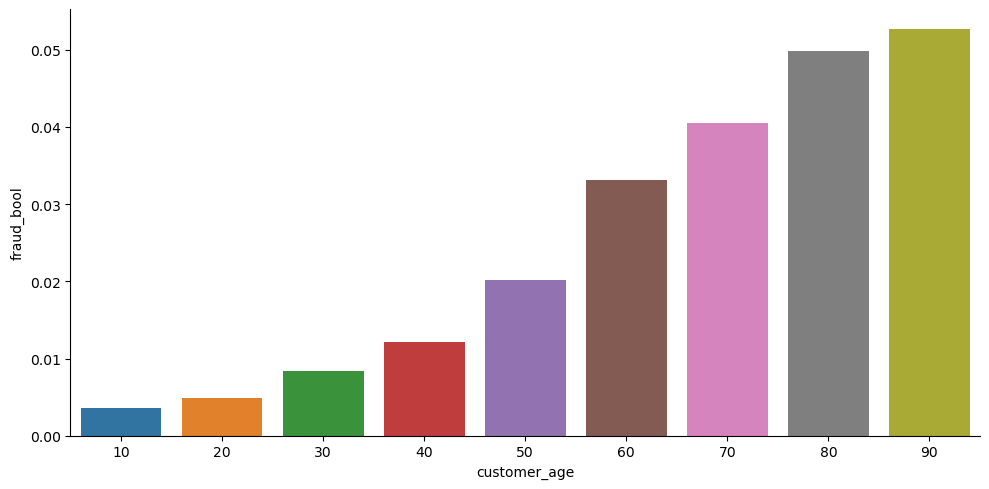

In [358]:
# correlation between fraud and age
sns.catplot(data=missing_df, x='customer_age', y='fraud_bool', kind='bar', height=5, aspect=2, ci=None)
# sns.relplot(data=missing_df, x='customer_age', y='fraud_bool', kind='bar', height=5, aspect=2, ci=None)

<AxesSubplot:xlabel='fraud_bool', ylabel='name_email_similarity'>

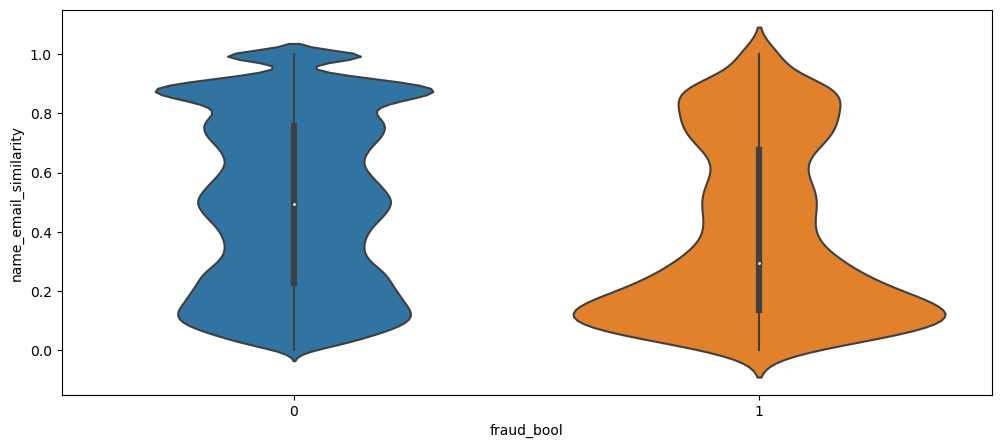

In [359]:
# correlation between fraud and name email similarity
plt.figure(figsize=(12,5))
sns.violinplot(y='name_email_similarity', x='fraud_bool', data=missing_df)

<AxesSubplot:xlabel='velocity_6h', ylabel='Count'>

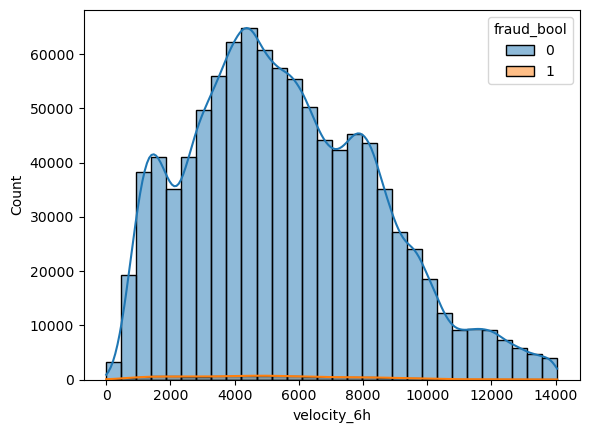

In [360]:
sns.histplot(data=missing_df, x='velocity_6h', hue='fraud_bool', bins=30, kde=True)

## Classification 

### One-hot Encoding

In [361]:
# payment type
print(f"Payment type has {missing_df['payment_type'].nunique()} unique values")
dummy = pd.get_dummies(missing_df['payment_type'])

# put dummy in missing_df
missing_df.drop('payment_type', axis=1, inplace=True)
missing_df = pd.concat([missing_df, dummy], axis=1)

Payment type has 5 unique values


In [362]:
# employment status
print(f"Employment status has {missing_df['employment_status'].nunique()} unique values")
dummy = pd.get_dummies(missing_df['employment_status'])

# put dummy in missing_df
missing_df.drop('employment_status', axis=1, inplace=True)
missing_df = pd.concat([missing_df, dummy], axis=1)

Employment status has 7 unique values


In [363]:
# housing status
print(f"Housing status has {missing_df['housing_status'].nunique()} unique values")
dummy = pd.get_dummies(missing_df['housing_status'])

# put dummy in missing_df
missing_df.drop('housing_status', axis=1, inplace=True)
missing_df = pd.concat([missing_df, dummy], axis=1)

Housing status has 7 unique values


In [364]:
# source
print(f"Source has {missing_df['source'].nunique()} unique values")
dummy = pd.get_dummies(missing_df['source'])

# put dummy in missing_df
missing_df.drop('source', axis=1, inplace=True)
missing_df = pd.concat([missing_df, dummy], axis=1)

Source has 2 unique values


In [365]:
# device os 
print(f"Device OS has {missing_df['device_os'].nunique()} unique values")
dummy = pd.get_dummies(missing_df['device_os'])

# put dummy in missing_df
missing_df.drop('device_os', axis=1, inplace=True)
missing_df = pd.concat([missing_df, dummy], axis=1)

Device OS has 5 unique values


### Logistic regression with only credit risk score 

In [366]:
# normalize credit_risk_score
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = missing_df[['credit_risk_score']]

norm_x = scaler.fit_transform(X)
norm_x

array([[0.63506261],
       [0.76744186],
       [0.62075134],
       ...,
       [0.41860465],
       [0.59570662],
       [0.36851521]])

<AxesSubplot:xlabel='credit_risk_score', ylabel='Count'>

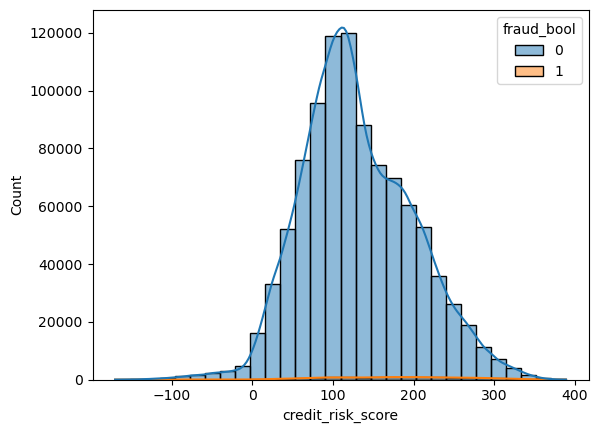

In [367]:
sns.histplot(x="credit_risk_score", hue="fraud_bool", data=missing_df, bins=30, kde=True)

In [368]:
from sklearn.model_selection import train_test_split

y = missing_df['fraud_bool']
X_train, X_test, y_train, y_test = train_test_split(norm_x, y, test_size=.2)

In [369]:
fraud_false_num = missing_df[missing_df['fraud_bool'] == 0].shape[0]
print(f"There are {fraud_false_num} rows that are not fraud")

fraud_true_num = missing_df[missing_df['fraud_bool'] == 1].shape[0]
print(f"There are {fraud_true_num} rows that are fraud")

There are 976439 rows that are not fraud
There are 10952 rows that are fraud


In [370]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(class_weight={0: 1, 1: fraud_false_num/fraud_true_num})
log_model.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1, 1: 89.15622717311906})

In [371]:
print(f'Accuracy for this model is: {log_model.score(X_test, y_test)}')

Accuracy for this model is: 0.6569002273659478


In [372]:
weights = [log_model.coef_, log_model.intercept_]
weights_df = pd.DataFrame(weights, ['weights', 'intercept'], ['log_one_var'])
weights_df

/opt/homebrew/Caskroom/miniforge/base/envs/jupyter/lib/python3.9/site-packages/pandas/core/internals/construction.py:568: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


,log_one_var
weights,4.546625
intercept,-2.633378


In [373]:
res_df = pd.DataFrame(log_model.score(X_test, y_test), ['score'], ['log_one_var'])
res_df

,log_one_var
score,0.6569


### Logistic regression with all variables

In [374]:
# normalize all the variables
df_scaled = pd.DataFrame(scaler.fit_transform(missing_df), columns=missing_df.columns)
df_scaled.head(5)

,fraud_bool,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,AA,AB,AC,AD,AE,CA,CB,CC,CD,CE,CF,CG,BA,BB,BC,BD,BE,BF,BG,INTERNET,TELEAPP,linux,macintosh,other,windows,x11
0,1.0,1.0,0.166827,0.207459,0.500,0.000267,0.110510,0.114644,0.758213,0.239789,0.248955,0.000419,0.153846,0.635063,0.0,1.0,0.0,0.757576,0.0,0.162304,0.0,0.056250,0.0,0.666667,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,1.0,0.296285,0.337995,0.500,0.000069,0.114520,0.054486,0.037974,0.179202,0.071612,0.301048,0.076923,0.767442,1.0,0.0,0.0,0.484848,0.0,0.685864,0.0,0.377435,0.0,0.666667,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,1.0,0.044984,0.310023,0.375,0.039621,0.114990,0.129721,0.288181,0.208319,0.080077,0.000419,0.358974,0.620751,1.0,0.0,1.0,0.000000,0.0,0.005236,0.0,0.065924,0.0,0.666667,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,1.0,0.159510,0.053613,0.500,0.000243,0.111493,0.120764,0.246072,0.360153,0.047137,0.805451,0.153846,0.500894,1.0,0.0,1.0,0.969697,1.0,0.005236,0.0,0.035074,0.0,0.666667,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.596414,0.510490,0.500,0.000057,0.114854,0.132706,0.357366,0.186696,0.062826,0.834382,0.051282,0.831843,1.0,1.0,0.0,0.969697,0.0,0.685864,0.0,0.054951,1.0,0.666667,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [375]:
X = df_scaled.drop('fraud_bool', axis=1)
y = df_scaled['fraud_bool']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [376]:
log_model = LogisticRegression(class_weight={0: 1, 1: fraud_false_num/fraud_true_num}, max_iter=500)
log_model.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1, 1: 89.15622717311906}, max_iter=500)

In [377]:
print(f'Accuracy for this model is: {log_model.score(X_test, y_test)}')

Accuracy for this model is: 0.804136135994207


In [378]:
weights = [log_model.coef_, log_model.intercept_]
weights_df['log_all_var'] = weights
weights_df

,log_one_var,log_all_var
weights,4.546625,"[[0.780734589081075, -1.2195336769583769, 0.72..."
intercept,-2.633378,[-1.9926219600987685]


In [379]:
log_model.coef_.shape

(1, 51)

<AxesSubplot:>

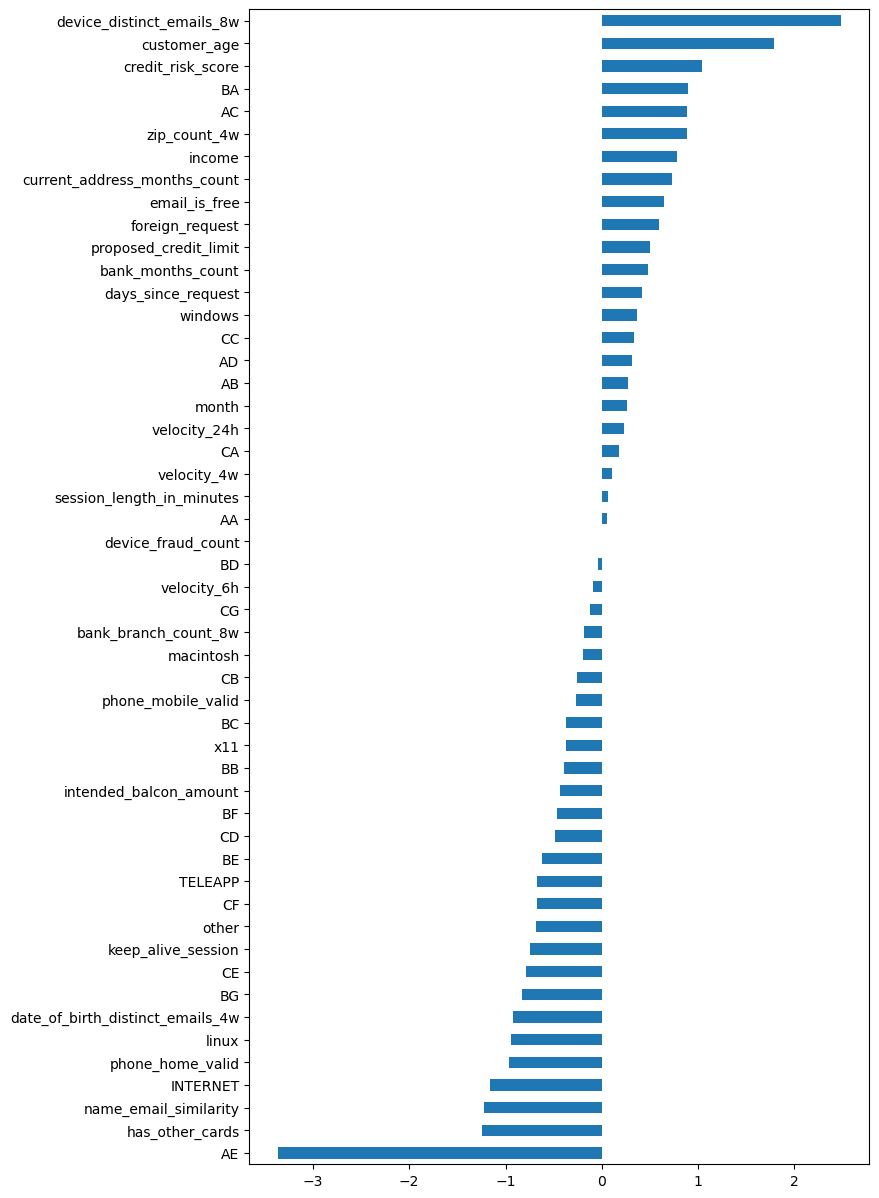

In [380]:
pd.Series(log_model.coef_[0], index=X.columns).sort_values(ascending=True).plot(kind='barh', figsize=(8,15))

In [381]:
res_df['log_all_var'] = log_model.score(X_test, y_test)
res_df

,log_one_var,log_all_var
score,0.6569,0.804136


### Random Forest 

In [382]:
from sklearn.model_selection import GridSearchCV

params = { 
    "n_estimators" : [25, 50, 75],
    "max_depth" : [5, 10, 25, None],
}

In [383]:
subsample_df = df_scaled.sample(frac=0.)
X = df_scaled.drop('fraud_bool', axis=1)
y = df_scaled['fraud_bool']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

In [384]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(class_weight={0: 1, 1: fraud_false_num/fraud_true_num})
gs = GridSearchCV(rfc, param_grid=params, cv=2)

In [385]:
gs.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=RandomForestClassifier(class_weight={0: 1,
                                                            1: 89.15622717311906}),
             param_grid={'max_depth': [3, 5, 10, 25, None],
                         'n_estimators': [25, 50, 75]})

In [386]:
print(gs.best_params_)
print(gs.best_score_)

{'max_depth': None, 'n_estimators': 50}
0.9889050932255745


In [387]:
rfc = RandomForestClassifier(class_weight={0: 1, 1: fraud_false_num/fraud_true_num}, 
                             max_depth=None, n_estimators=75)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.988874766430861

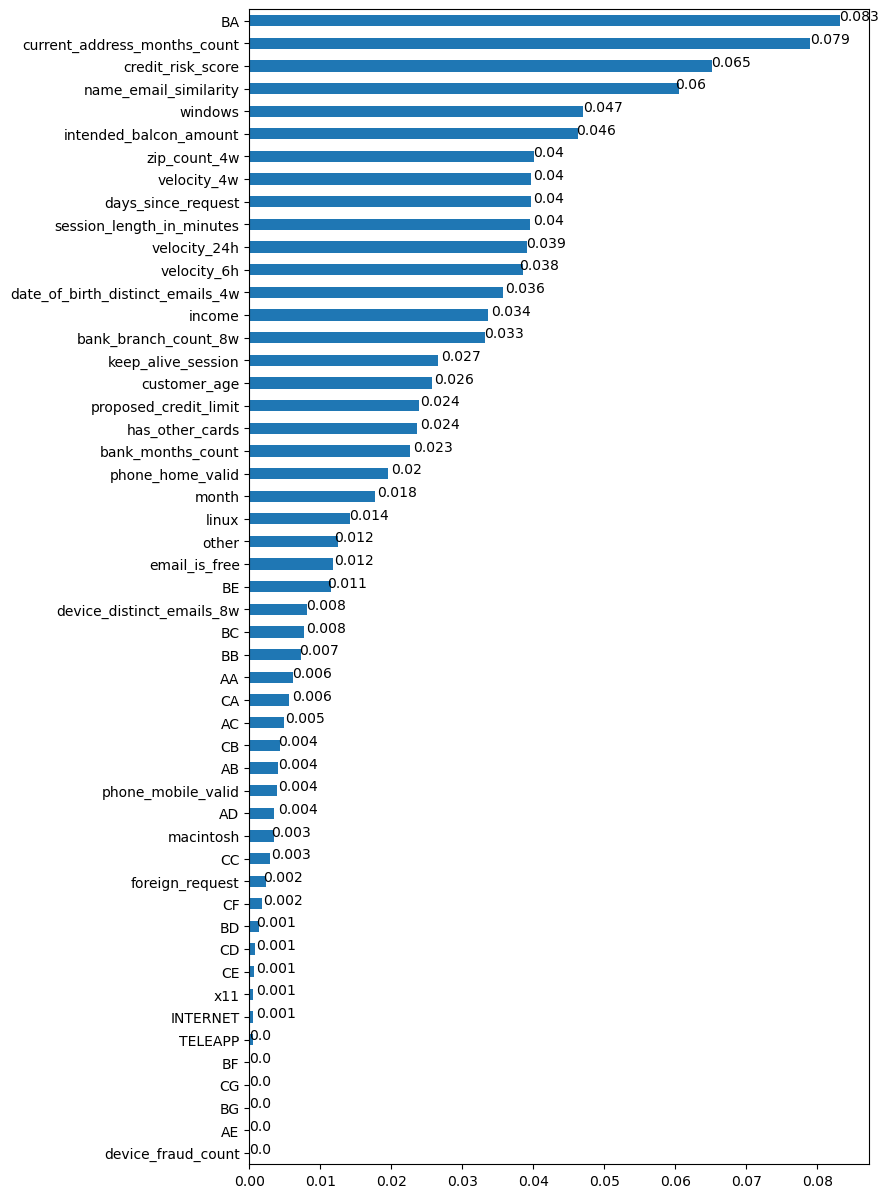

In [459]:
feature_importances = pd.Series(rfc.feature_importances_, index=X.columns)
sorted_importances = feature_importances.sort_values(ascending=True)

sorted_importances.plot(kind='barh', figsize=(8,15))

for index, value in enumerate(sorted_importances):
    value = round(value, 3)
    plt.text(value, index, str(value))


In [389]:
weights_df['random_forest'] = [rfc.feature_importances_, 0]
weights_df

,log_one_var,log_all_var,random_forest
weights,4.546625,"[[0.780734589081075, -1.2195336769583769, 0.72...","[0.03365679996647439, 0.06049687438861905, 0.0..."
intercept,-2.633378,[-1.9926219600987685],0


In [390]:
res_df['random_forest'] = rfc.score(X_test, y_test)
res_df

,log_one_var,log_all_var,random_forest
score,0.6569,0.804136,0.988875


Text(0.5, 23.52222222222222, 'Predicted label')

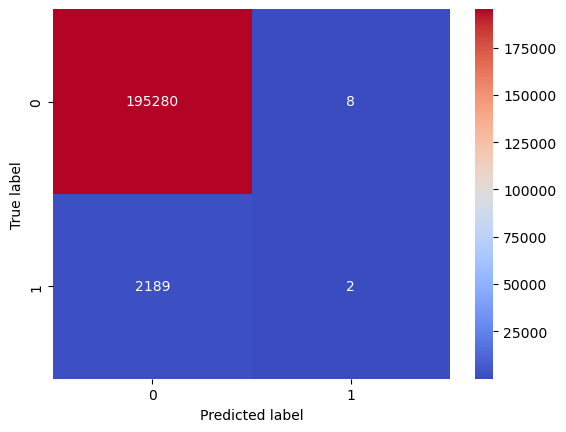

In [391]:
from sklearn.metrics import confusion_matrix

preds = rfc.predict(X_test)
conf_matrix = confusion_matrix(y_test, preds)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.ylabel('True label')
plt.xlabel('Predicted label')

### LG Boost 

In [392]:
from lightgbm import LGBMClassifier, early_stopping, log_evaluation, plot_importance

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

lgb = LGBMClassifier(random_state=0, max_depth=15, n_estimators=75, colsample_bytree=0.6, 
                     scale_pos_weight=fraud_false_num/fraud_true_num, subsample=0.8)
es = early_stopping(200)
lg = log_evaluation(200)

In [393]:
lgb.fit(X_train, y_train, eval_set=(X_val, y_val), callbacks=[lg, es])

Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[75]	valid_0's binary_logloss: 0.396786


LGBMClassifier(colsample_bytree=0.6, max_depth=15, n_estimators=75,
               random_state=0, scale_pos_weight=89.15622717311906,
               subsample=0.8)

In [394]:
lgb.score(X_test, y_test)

0.821322773560733

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

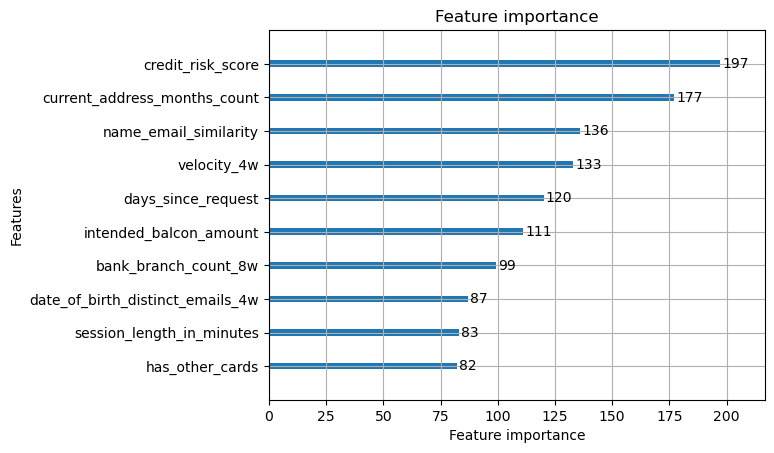

In [395]:
plot_importance(lgb, max_num_features=10)

In [396]:
weights_df['lg boost'] = [rfc.feature_importances_, 0]
weights_df

,log_one_var,log_all_var,random_forest,lg boost
weights,4.546625,"[[0.780734589081075, -1.2195336769583769, 0.72...","[0.03365679996647439, 0.06049687438861905, 0.0...","[0.03365679996647439, 0.06049687438861905, 0.0..."
intercept,-2.633378,[-1.9926219600987685],0,0


In [397]:
res_df['lg boost'] = lgb.score(X_test, y_test)
res_df

,log_one_var,log_all_var,random_forest,lg boost
score,0.6569,0.804136,0.988875,0.821323


Text(0.5, 23.52222222222222, 'Predicted label')

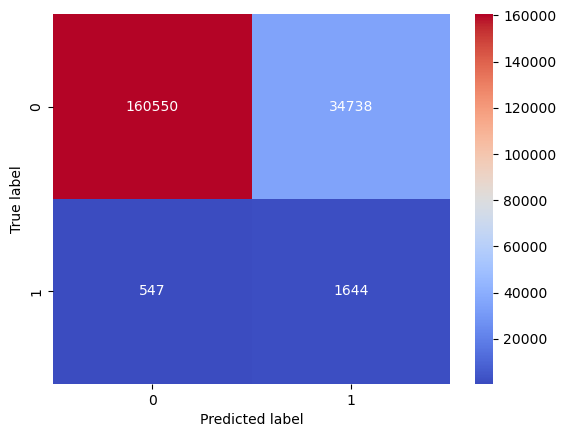

In [398]:
preds = lgb.predict(X_test)
conf_matrix = confusion_matrix(y_test, preds)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.ylabel('True label')
plt.xlabel('Predicted label')

## Clustering

In [405]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score

sil_score = []
cal_score = []

X_sub = X.sample(frac=.05)

for i in range(3, 6):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_sub)
    sil_score.append(silhouette_score(X_sub, kmeans.labels_))
    cal_score.append(calinski_harabasz_score(X_sub, kmeans.labels_))
    print(f"Finished {i}")

print(sil_score)
print(cal_score)

Finished 3
Finished 4
Finished 5
[0.0999655919926965, 0.09469196817151619, 0.09445274222423272]
[3975.621751266917, 3405.471642442665, 3170.550988600442]


/var/folders/qg/g7gs2bjn2llf1p8c229qrymw0000gn/T/ipykernel_3095/2080625672.py:2: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Text(0, 0.5, 'Calinski-Harabasz Index')

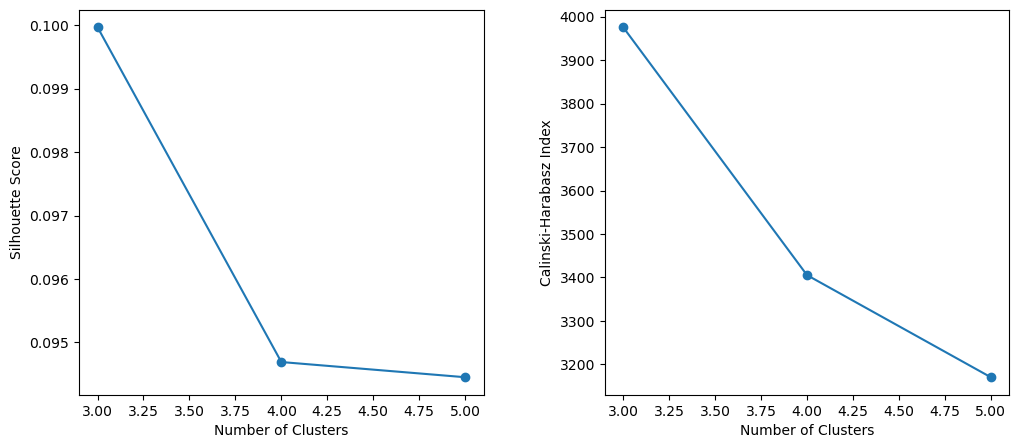

In [415]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), gridspec_kw={'wspace': 0.3, 'hspace': 0.3})
plt.tight_layout()

x = range(3,6)
axes[0].plot(x, sil_score, '-o')
axes[0].set_xlabel("Number of Clusters")
axes[0].set_ylabel("Silhouette Score")

axes[1].plot(x, cal_score, '-o')
axes[1].set_xlabel("Number of Clusters")
axes[1].set_ylabel("Calinski-Harabasz Index")

In [418]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [423]:
clusters_df = df_scaled.copy()
clusters_df['clusters'] = kmeans.labels_
clusters_df = clusters_df.groupby('clusters').mean()

,fraud_bool,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,AA,AB,AC,AD,AE,CA,CB,CC,CD,CE,CF,CG,BA,BB,BC,BD,BE,BF,BG,INTERNET,TELEAPP,linux,macintosh,other,windows,x11
clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.007059,0.604909,0.503919,0.216193,0.285290,0.014374,0.302700,0.242057,0.418326,0.474509,0.516912,0.109340,0.250749,0.527304,0.529051,0.414783,0.909517,0.486710,0.260212,0.170268,0.028502,0.102290,0.575456,0.671890,0.0,0.431910,0.684372,0.000000,0.000000,0.314929,0.000699,0.724363,0.167211,0.027161,0.019911,0.029755,0.031029,0.000570,0.154281,0.168436,0.424571,0.027363,0.222670,0.002177,0.000503,0.995624,0.004376,0.314814,0.060860,0.379703,0.234707,0.009917
1,0.011337,0.570042,0.479707,0.203032,0.309708,0.004605,0.121384,0.230790,0.381624,0.432196,0.464504,0.093386,0.238133,0.549828,0.535640,0.457291,0.881860,0.452988,0.212321,0.181982,0.024749,0.092881,0.585346,0.673170,0.0,0.501523,0.000000,0.999975,0.000000,0.000000,0.000025,0.726961,0.130128,0.047163,0.025600,0.018684,0.051090,0.000375,0.183646,0.320347,0.325463,0.024670,0.144451,0.001332,0.000093,0.996205,0.003795,0.330669,0.050808,0.303959,0.309275,0.005288
2,0.016742,0.554115,0.498316,0.187165,0.292567,0.023641,0.115487,0.227520,0.388410,0.437568,0.468498,0.004648,0.240432,0.540284,0.521185,0.362216,0.872211,0.029963,0.183858,0.155248,0.020955,0.100219,0.564986,0.673261,0.0,0.491231,0.000000,0.000000,0.999936,0.000000,0.000064,0.745383,0.105472,0.039952,0.037713,0.017915,0.053181,0.000384,0.174958,0.310437,0.362797,0.027023,0.123275,0.001402,0.000108,0.984148,0.015852,0.359565,0.047830,0.345206,0.241244,0.006156


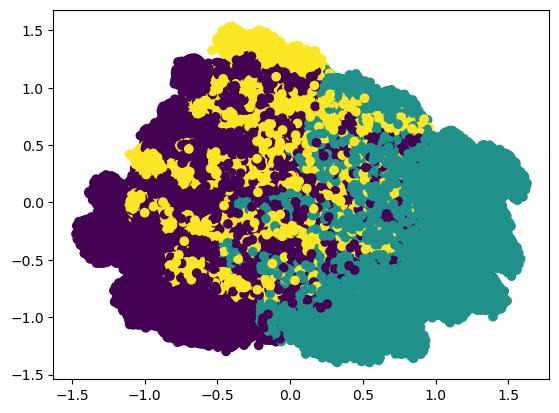

In [438]:
from sklearn.decomposition import PCA

X = df_scaled.drop('fraud_bool', axis=1)

pca = PCA(n_components=2)
pca.fit(X)
x_pca = pca.transform(X)
plt.scatter(x_pca[:,0], x_pca[:,1], c=kmeans.labels_)

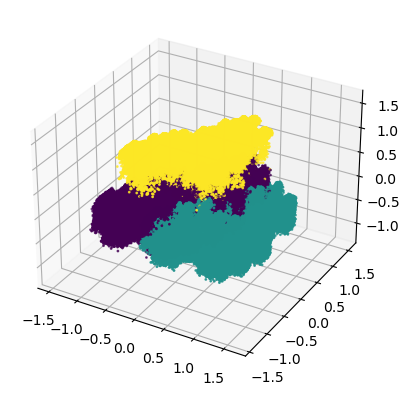

In [449]:
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
pca.fit(X)
x_pca = pca.transform(X)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2], c=kmeans.labels_, s=1)